# Example Map Plotting

### At the start of a Jupyter notebook you need to import all modules that you will use

In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import cartopy
import cartopy.crs as ccrs                 # For plotting maps
import cartopy.feature as cfeature         # For plotting maps
from cartopy.util import add_cyclic_point  # For plotting maps
import datetime

### Define the directories and file of interest for your results. This can be shortened to less lines as well.

In [3]:
#result_dir = "/home/buchholz/Documents/code_database/untracked/my-notebook/Janyl_plotting/"
result_dir = "../../data/"
file = "CAM_chem_merra2_FCSD_1deg_QFED_monthly_2019.nc"
#the netcdf file is now held in an xarray dataset named 'nc' and can be referenced later in the notebook
nc_load = xr.open_dataset(result_dir+file)
#to see what the netCDF file contains, just call the variable you read it into
nc_load

<xarray.Dataset>
Dimensions:          (ilev: 57, lat: 192, lev: 56, lon: 288, nbnd: 2, time: 6)
Coordinates:
  * lat              (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon              (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev              (lev) float64 1.868 2.353 2.948 3.677 ... 962.5 977.5 992.5
  * ilev             (ilev) float64 1.651 2.085 2.62 3.276 ... 970.0 985.0 1e+03
  * time             (time) datetime64[ns] 2019-02-01 2019-03-01 ... 2019-07-01
Dimensions without coordinates: nbnd
Data variables:
    hyam             (lev) float64 ...
    hybm             (lev) float64 ...
    P0               float64 ...
    hyai             (ilev) float64 ...
    hybi             (ilev) float64 ...
    date             (time) int32 ...
    datesec          (time) int32 ...
    time_bnds        (time, nbnd) datetime64[ns] ...
    AODDUST          (time, lat, lon) float32 ...
    AODDUST1         (time, lat, lon) float32 ...
    AODDUST2         (time, lat, lon) float32 ...
    AODDUST3         (time, lat, lon) float32 ...
    AODNIRstdn       (time, lat, lon) float32 ...
    AODUVdn          (time, lat, lon) float32 ...
    AODUVstdn        (time, lat, lon) float32 ...
    AODVIS           (time, lat, lon) float32 ...
    AODVISdn         (time, lat, lon) float32 ...
    AODVISstdn       (time, lat, lon) float32 ...
    AODdnDUST1       (time, lat, lon) float32 ...
    AODdnDUST2       (time, lat, lon) float32 ...
    AODdnDUST3       (time, lat, lon) float32 ...
    AODdnMODE1       (time, lat, lon) float32 ...
    AODdnMODE2       (time, lat, lon) float32 ...
    AODdnMODE3       (time, lat, lon) float32 ...
    BURDENBCdn       (time, lat, lon) float32 ...
    BURDENDUSTdn     (time, lat, lon) float32 ...
    BURDENPOMdn      (time, lat, lon) float32 ...
    BURDENSEASALTdn  (time, lat, lon) float32 ...
    BURDENSO4dn      (time, lat, lon) float32 ...
    BURDENSOAdn      (time, lat, lon) float32 ...
    CH2O             (time, lev, lat, lon) float32 ...
    CO               (time, lev, lat, lon) float32 ...
    HCN              (time, lev, lat, lon) float32 ...
    NH3              (time, lev, lat, lon) float32 ...
    NH4              (time, lev, lat, lon) float32 ...
    NO               (time, lev, lat, lon) float32 ...
    NO2              (time, lev, lat, lon) float32 ...
    O3               (time, lev, lat, lon) float32 ...
    PBLH             (time, lat, lon) float32 ...
    PDELDRY          (time, lev, lat, lon) float32 ...
    PM25             (time, lev, lat, lon) float32 ...
    PS               (time, lat, lon) float32 ...
    Q                (time, lev, lat, lon) float32 ...
    SO2              (time, lev, lat, lon) float32 ...
    T                (time, lev, lat, lon) float32 ...
    U                (time, lev, lat, lon) float32 ...
    V                (time, lev, lat, lon) float32 ...
    Z3               (time, lev, lat, lon) float32 ...
    bc_a1            (time, lev, lat, lon) float32 ...
    bc_a4            (time, lev, lat, lon) float32 ...
    ncl_a1           (time, lev, lat, lon) float32 ...
    ncl_a2           (time, lev, lat, lon) float32 ...
    ncl_a3           (time, lev, lat, lon) float32 ...
    pom_a1           (time, lev, lat, lon) float32 ...
    pom_a4           (time, lev, lat, lon) float32 ...
    so4_a1           (time, lev, lat, lon) float32 ...
    so4_a2           (time, lev, lat, lon) float32 ...
    so4_a3           (time, lev, lat, lon) float32 ...
    soa1_a1          (time, lev, lat, lon) float32 ...
    soa1_a2          (time, lev, lat, lon) float32 ...
    soa2_a1          (time, lev, lat, lon) float32 ...
    soa2_a2          (time, lev, lat, lon) float32 ...
    soa3_a1          (time, lev, lat, lon) float32 ...
    soa3_a2          (time, lev, lat, lon) float32 ...
    soa4_a1          (time, lev, lat, lon) float32 ...
    soa4_a2          (time, lev, lat, lon) float32 ...
    soa5_a1          (time, lev, lat, lon) float3

### Extract the variable of choice at the time and level of choice

In [4]:
#extract grid variables
lat = nc_load['lat']
lon = nc_load['lon']

#extract variable
var_sel = nc_load['PM25']
print(var_sel)
#print(var_sel[0][0][0][0])

#select the surface level at a specific time and convert to ppbv from vmr
#var_srf = var_sel.isel(time=0, lev=55)
#select the surface level for an average over three times and convert to ppbv from vmr
var_srf = var_sel.isel(time=[2,3,4], lev=55) # MAM chosen
var_srf = var_srf.mean('time')
var_srf = var_srf*1e09 # 10-9 to ppb
print(var_srf.shape)

<xarray.DataArray 'PM25' (time: 6, lev: 56, lat: 192, lon: 288)>
[18579456 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lev      (lev) float64 1.868 2.353 2.948 3.677 ... 947.5 962.5 977.5 992.5
  * time     (time) datetime64[ns] 2019-02-01 2019-03-01 ... 2019-07-01
Attributes:
    mdims:         1
    units:         kg/m3
    long_name:     PM2.5 concentration
    cell_methods:  time: mean
(192, 288)


In [5]:
# Add cyclic point to avoid white line over Africa
var_srf_cyc, lon_cyc = add_cyclic_point(var_srf, coord=lon) 

### Plot the value over a specific region

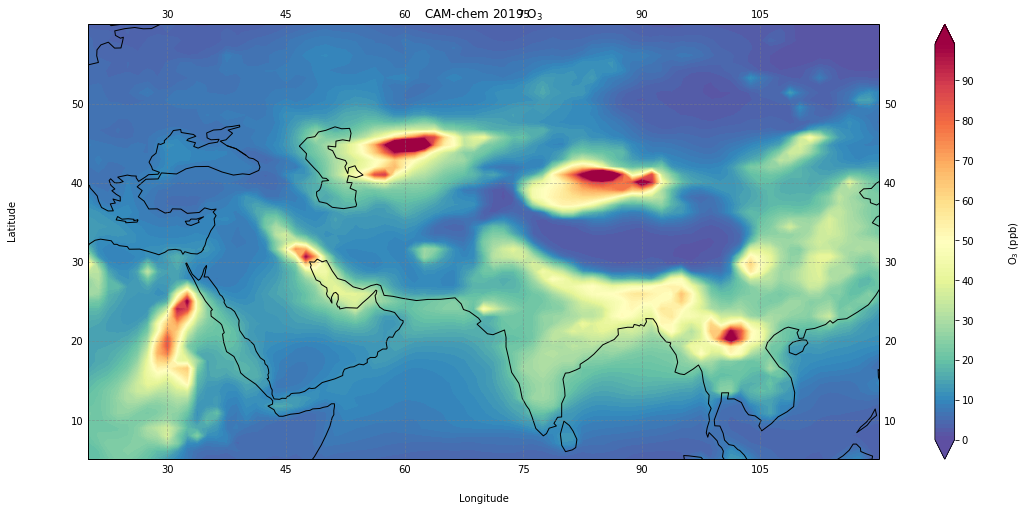

In [6]:
plt.figure(figsize=(20,8))

#Define projection
ax = plt.axes(projection=ccrs.PlateCarree())

#define contour levels
clev = np.arange(0, 100, 1)

#plot the data
plt.contourf(lon_cyc,lat,var_srf_cyc,clev,cmap='Spectral_r',extend='both')

# add coastlines
#ax.coastlines() 
ax.add_feature(cfeature.COASTLINE)

#add lat lon grids
ax.gridlines(draw_labels=True, color='grey', alpha=0.5, linestyle='--')

#longitude limits in degrees
ax.set_xlim(20,120)
#latitude limits in degrees
ax.set_ylim(5,60)

# Title
plt.title("CAM-chem 2019 O$_{3}$")

#axes
# y-axis
ax.text(-0.09, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
# x-axis
ax.text(0.5, -0.10, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
# legend
ax.text(1.18, 0.5, 'O$_{3}$ (ppb)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)

plt.colorbar()
plt.show() 

### Add location markers

In [7]:
##Now lets look at the sufrace plot again, but this time add markers for observations at several points.
#first we need to define our observational data into an array
#this can also be imported from text files using various routines
# Kyzylorda, Urzhar, Almaty, Balkhash
obs_lat = np.array([44.8488,47.0870,43.2220,46.2161])
obs_lon = np.array([65.4823,81.6315,76.8512,74.3775])
obs_names = ["Kyzylorda", "Urzhar", "Almaty", "Balkhash"]
num_obs = obs_lat.shape[0]

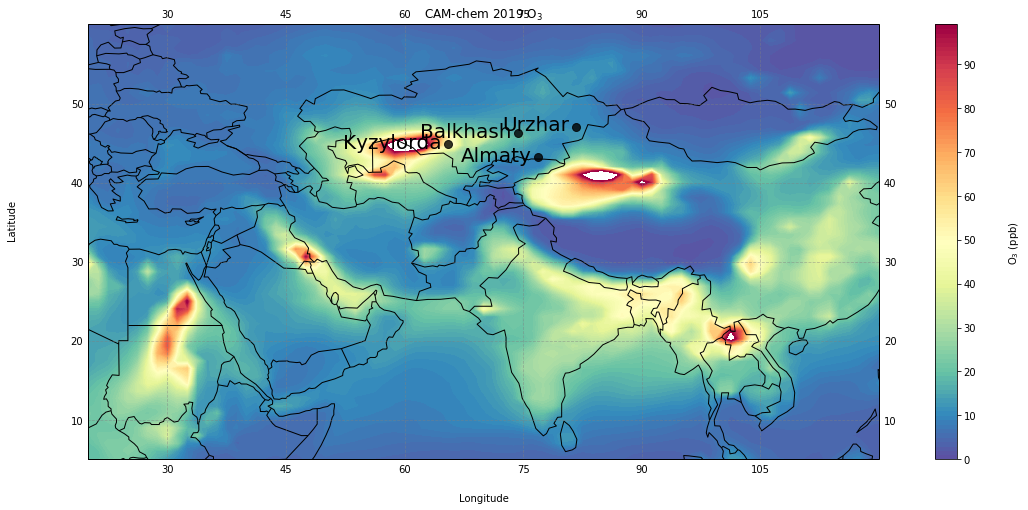

In [8]:
plt.figure(figsize=(20,8))

#Define projection
ax = plt.axes(projection=ccrs.PlateCarree())

#define contour levels
clev = np.arange(0, 100, 1)

#plot the data
plt.contourf(lon_cyc,lat,var_srf_cyc,clev,cmap='Spectral_r')

# add coastlines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

#add lat lon grids
ax.gridlines(draw_labels=True, color='grey', alpha=0.5, linestyle='--')

#longitude limits in degrees
ax.set_xlim(20,120)
#latitude limits in degrees
ax.set_ylim(5,60)

# Title
plt.title("CAM-chem 2019 O$_{3}$")

#axes
# y-axisCOUNTRY
ax.text(-0.09, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
# x-axis
ax.text(0.5, -0.10, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
# legend
ax.text(1.18, 0.5, 'O$_{3}$ (ppb)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)

#convert your observation lat/lon to Lambert-Conformal grid points
#xpt,ypt = m(obs_lon,obs_lat)

#to specify the color of each point it is easiest plot individual points in a loop
for i in range(num_obs):
    plt.plot(obs_lon[i], obs_lat[i], linestyle='none', marker="o", markersize=8, alpha=0.8, c="black", markeredgecolor="black", markeredgewidth=1, transform=ccrs.PlateCarree())
    plt.text(obs_lon[i] - 0.8, obs_lat[i] - 0.5, obs_names[i], fontsize=20, horizontalalignment='right', transform=ccrs.PlateCarree())

    
plt.colorbar()
plt.show() 

In [9]:
cartopy.config['data_dir']

'/home/buchholz/.local/share/cartopy'